In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.isna().sum()

cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
cap-shape_s    0
cap-shape_x    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 95, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(8124, 23)

In [ ]:
y = df.pop('class')
y = y.map( {'e': 1, 'p': 0} ).astype(int)

In [ ]:
cat_col = df.select_dtypes(include = 'object').columns
df = pd.get_dummies(df , cat_col ,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split( df , y
                                                    , test_size=0.2 , random_state=True)

In [ ]:
X_train.shape

(6499, 95)

In [ ]:
y_train.unique()

array([1, 0])

In [ ]:
model_Seq = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[95]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1 , activation = 'sigmoid')
])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model_Seq.compile(loss = 'binary_crossentropy' , optimizer = optimizer,metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint('model_Seq.h5' , save_best_only=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: >

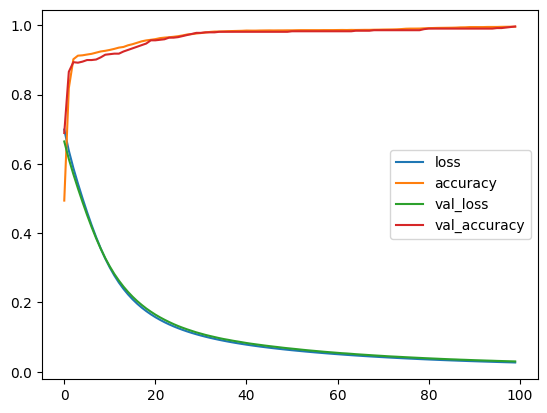

In [ ]:
history = model_Seq.fit(X_train, y_train, epochs=100 ,validation_split=0.1 ,verbose= 0 ,callbacks=[checkpoint_cb])
pd.DataFrame(history.history).plot()

In [ ]:
model_Seq.evaluate(X_test , y_test)

51/51 [==============================] - 0s 7ms/step - loss: 0.0365 - accuracy: 0.9914


[0.03651077300310135, 0.9913846254348755]

In [ ]:
model_Seq.evaluate(X_test , y_test)

51/51 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9914


[0.03651077300310135, 0.9913846254348755]

In [ ]:
def build_model(learning_rate=3e-3, input_shape=[95]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(1 , activation ='sigmoid'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss = 'binary_crossentropy' , optimizer = optimizer
                  ,metrics=["accuracy"])
    return model

In [ ]:
!pip install scikit-learn

In [ ]:

# Define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (300,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create a base MLPClassifier
mlp = MLPClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy of the best model:", test_accuracy)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Test accuracy of the best model: 1.0


Epoch 1/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 2/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 3/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 4/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 5/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 6/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 7/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 8/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 9/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 10/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 11/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 12/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 13/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 14/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 15/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 16/100 - Train accuracy: 1.0000, Test accuracy: 1.0000
Epoch 17/100 - Train accuracy: 1.

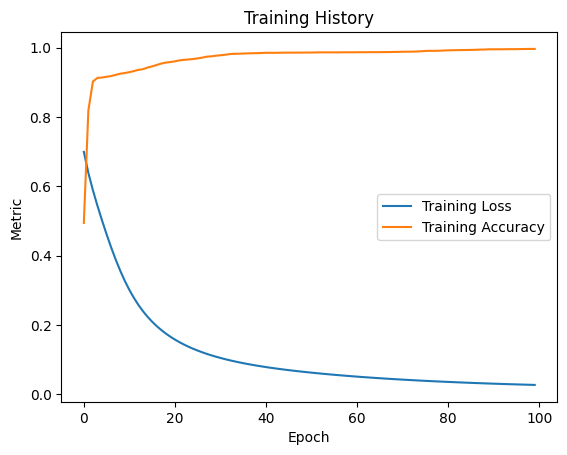

In [43]:
from sklearn.metrics import accuracy_score
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='constant', random_state=42)

# Train the model for multiple epochs
epochs = 100  # Number of epochs
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    ann_classifier.fit(X_train, y_train)  # Train the model for one epoch

    # Evaluate the model on the train set
    y_train_pred = ann_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Evaluate the model on the test set
    y_test_pred = ann_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs} - Train accuracy: {train_accuracy:.4f}, Test accuracy: {test_accuracy:.4f}")

# Print the final test accuracy
final_test_accuracy = test_accuracies[-1]
print(f"Final test accuracy after {epochs} epochs: {final_test_accuracy:.4f}")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training History')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
best_model = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant', random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       1.00      1.00      1.00       820

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[805   0]
 [  0 820]]
